In [1]:
%matplotlib inline

# import packages
import numpy as np
import time
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib import gridspec


In [2]:
# define plot properties
from cycler import cycler
import matplotlib.cm as cm

from matplotlib import rcParams
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.animation as animation

def rgb(r,g,b):
    return (float(r)/256.,float(g)/256.,float(b)/256.)

cb2 = [rgb(31,120,180), rgb(255,127,0), rgb(51,160,44), rgb(227,26,28), \
       rgb(166,206,227), rgb(253,191,111), rgb(178,223,138), rgb(251,154,153)]

rcParams['figure.figsize'] = (9,7.5)
rcParams['figure.dpi'] = 300

rcParams['lines.linewidth'] = 1

rcParams['axes.prop_cycle'] = cycler('color', cb2)
rcParams['axes.facecolor'] = 'white'
rcParams['axes.grid'] = False

rcParams['patch.facecolor'] = cb2[0]
rcParams['patch.edgecolor'] = 'white'

#rcParams['font.family'] = 'Bitstream Vera Sans' 
rcParams['font.size'] = 23
#rcParams['font.weight'] = 300


> Make image with delta spikes.

In [19]:
# make image
#image = np.zeros((1,256,256))
#image[np.random.uniform(size=(1,256,256)) < 0.3] = 1.
image = np.random.rand(256,256)<0.05

np.save("poisson_process_image.npy", image)

> Investigate results.

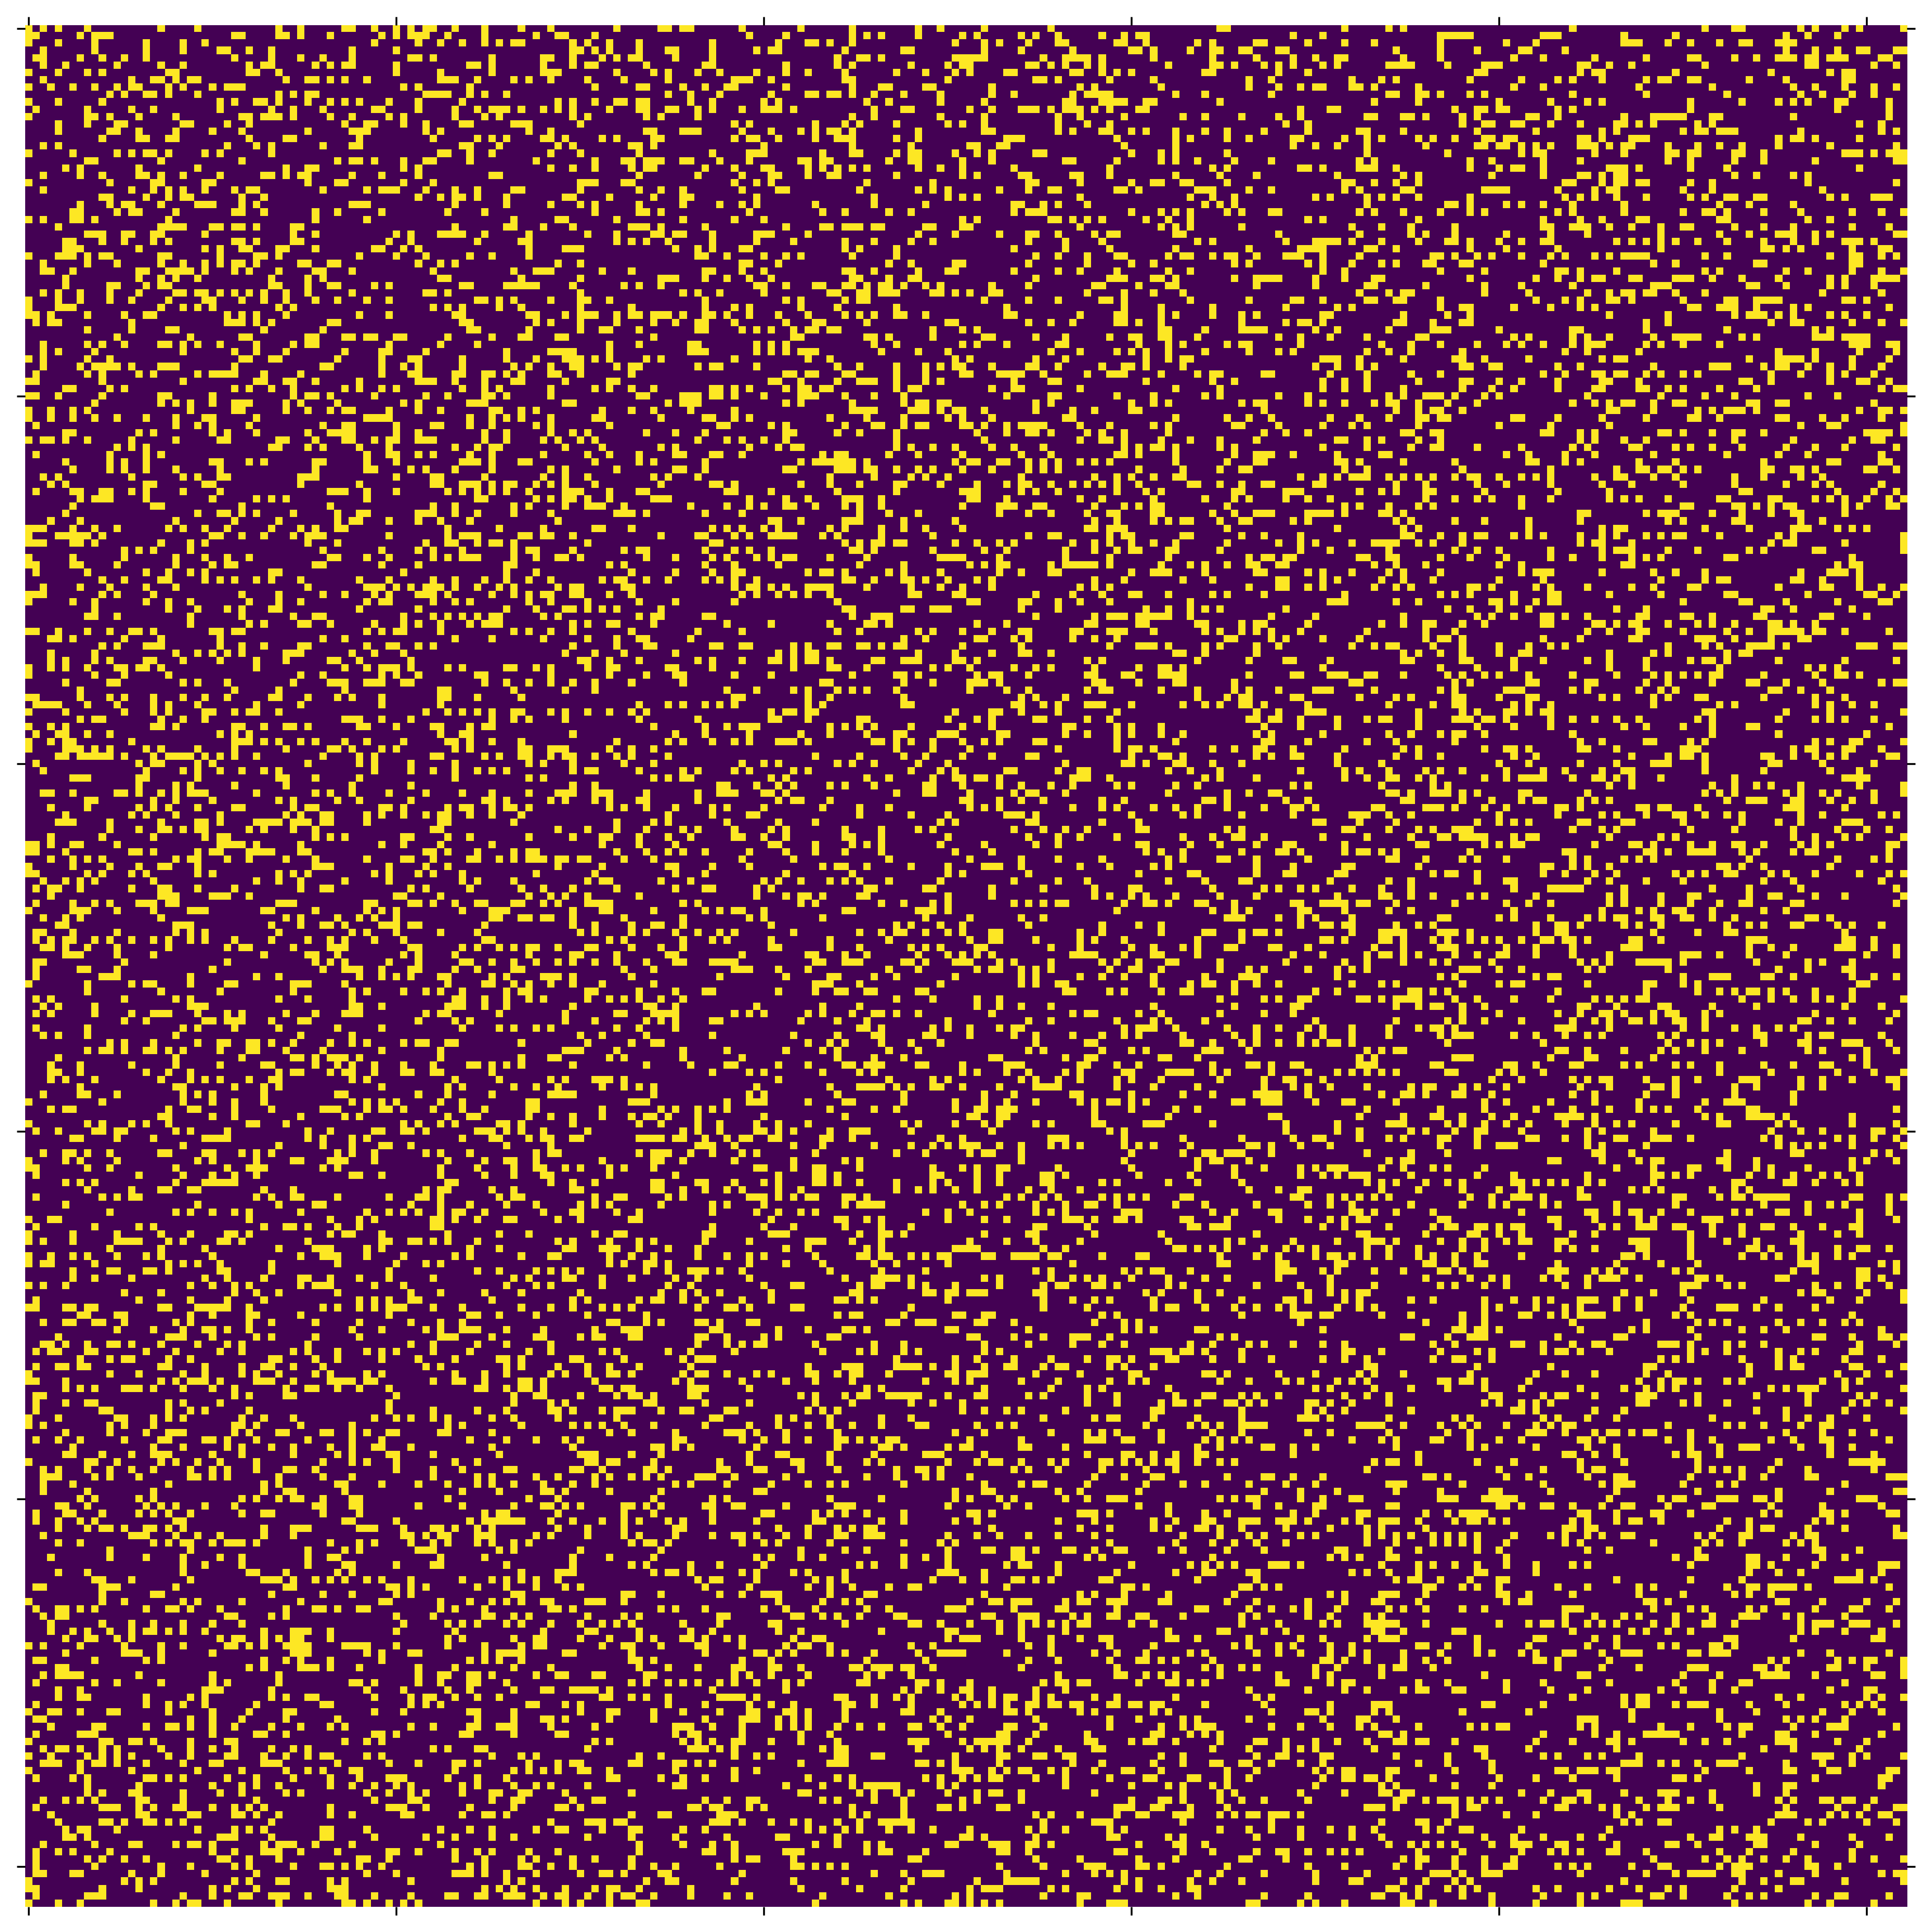

In [3]:
# initiate the plot
fig = plt.figure(figsize=[12,12]);
matplotlib.rcParams['axes.linewidth'] = 1.

# combine subplots
ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

#image = np.load("poisson_process_image.npy").reshape(256,256)
image = np.load("../delta_recovery.npy").reshape(256,256)
plt.imshow(image, vmin=-0.0, vmax=1.)

plt.tight_layout()


> Invextigate flux PDF.

/Users/yting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/yting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


Text(0.5, 0, 'Flux value')

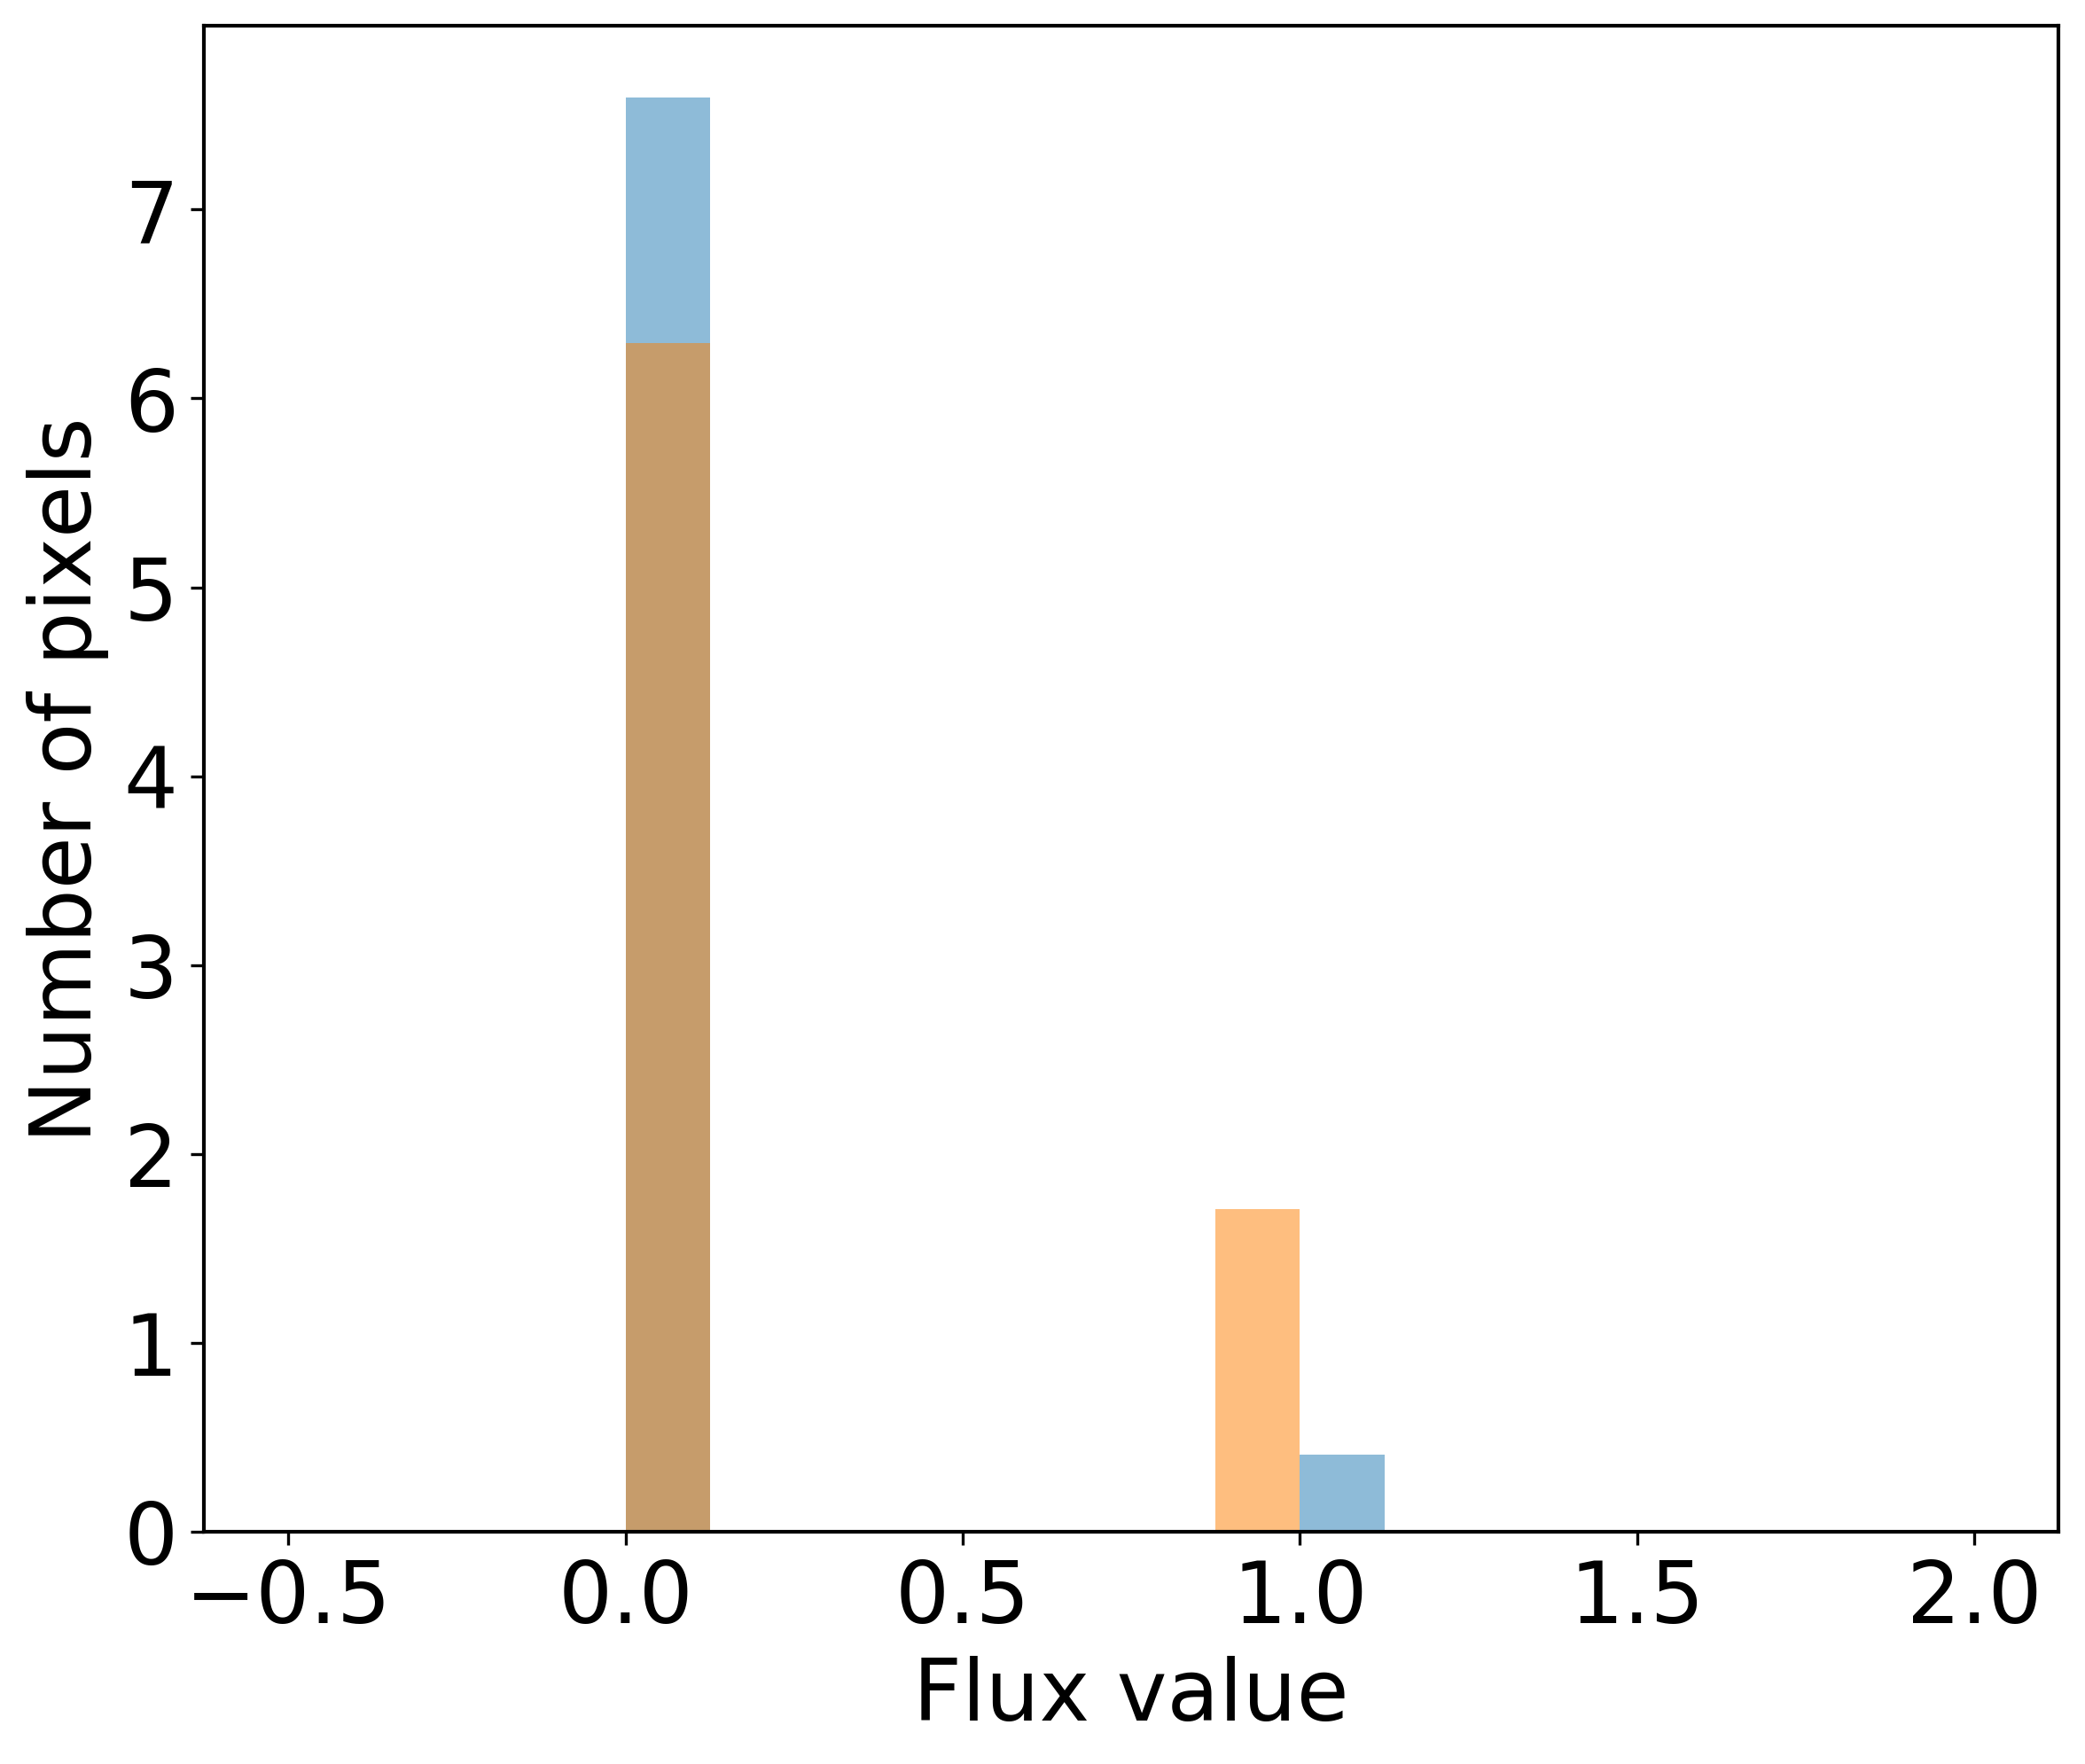

In [6]:
image = np.load("poisson_process_image.npy")
plt.hist(image.ravel(), alpha=0.5, range=[-0.5,2], bins=20, normed=True);

image = np.load("../delta_recovery.npy")
plt.hist(image.ravel(), alpha=0.5, range=[-0.5,2], bins=20, normed=True);

plt.ylabel("Number of pixels")
plt.xlabel("Flux value")

> Illustrate weak lensing data.

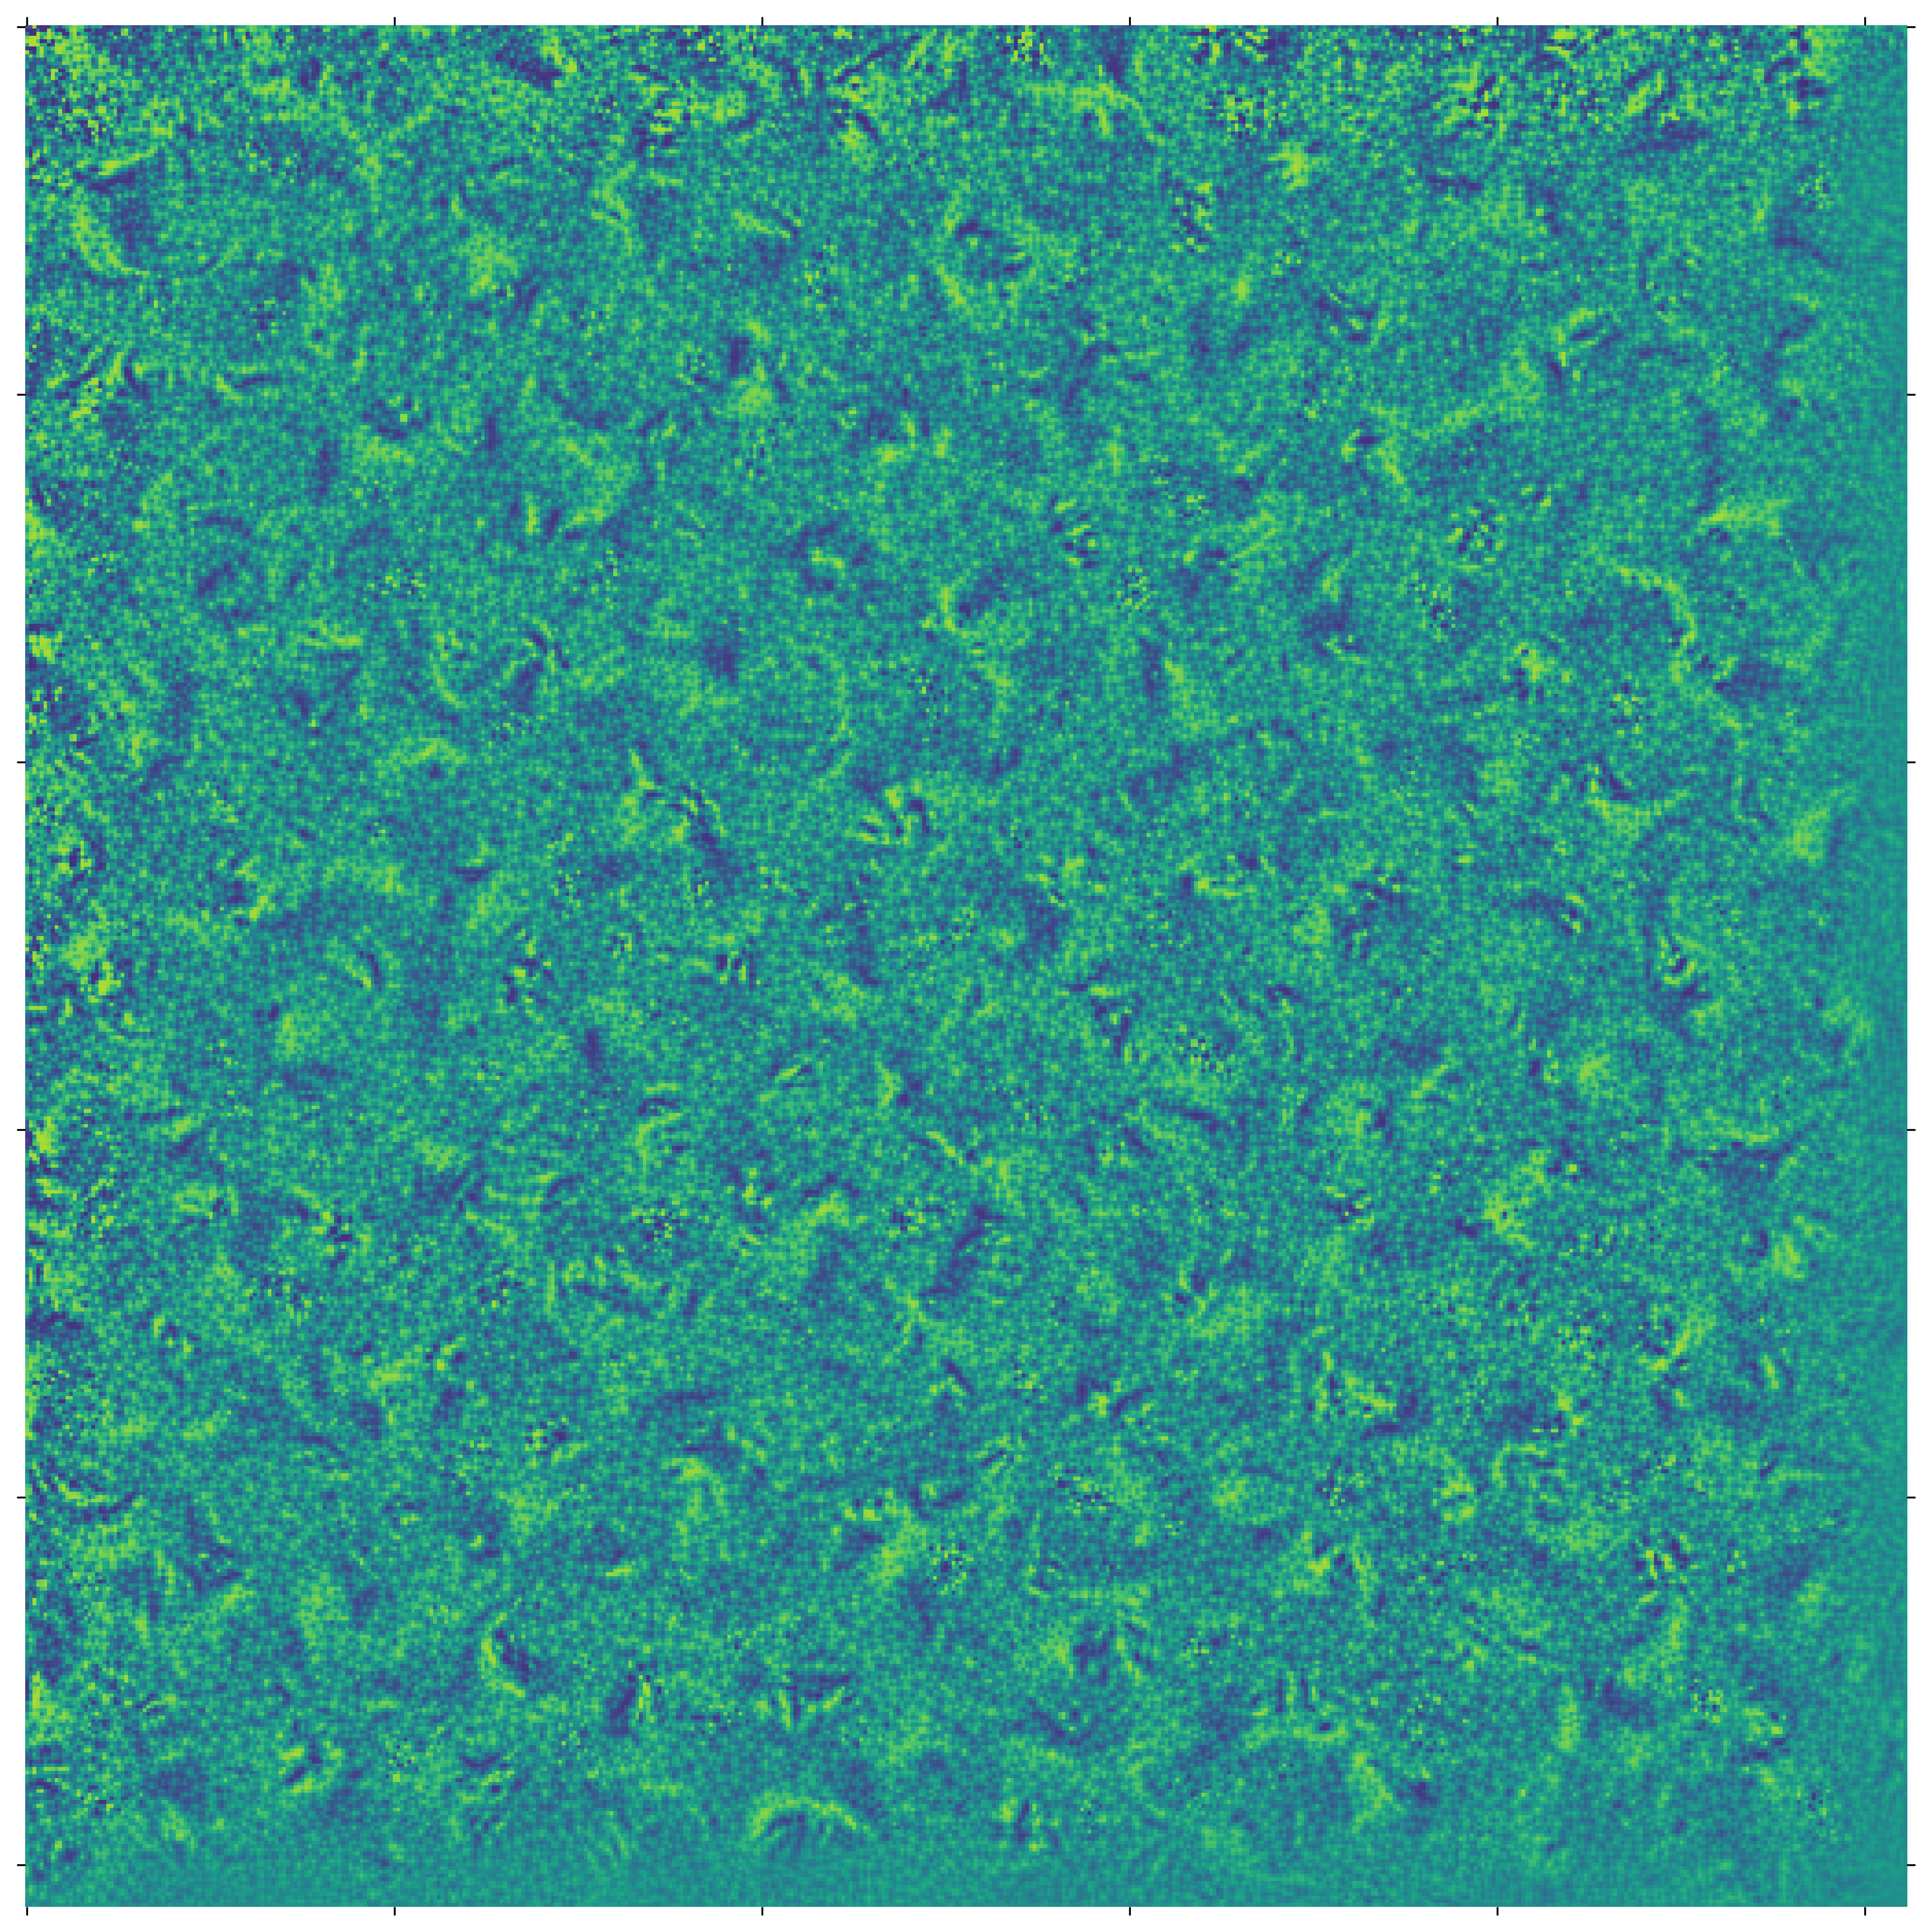

In [20]:
# initiate the plot
fig = plt.figure(figsize=[12,12]);
matplotlib.rcParams['axes.linewidth'] = 1.

# combine subplots
ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

image2 = np.load("../max_order=2.npy").reshape(512,512)
plt.imshow(image2, vmin=-0.05, vmax=0.1)

plt.tight_layout()


In [17]:
# load an initial guess
image = np.load("image_initial.npy")[0:1,:,:]
print(np.percentile(image,1))
print(np.percentile(image,99))
print(np.percentile(image,99)-np.percentile(image,1))

-0.02934368796646595
0.08139952920377262
0.11074321717023858


/Users/yting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yting/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 0, 'Flux value')

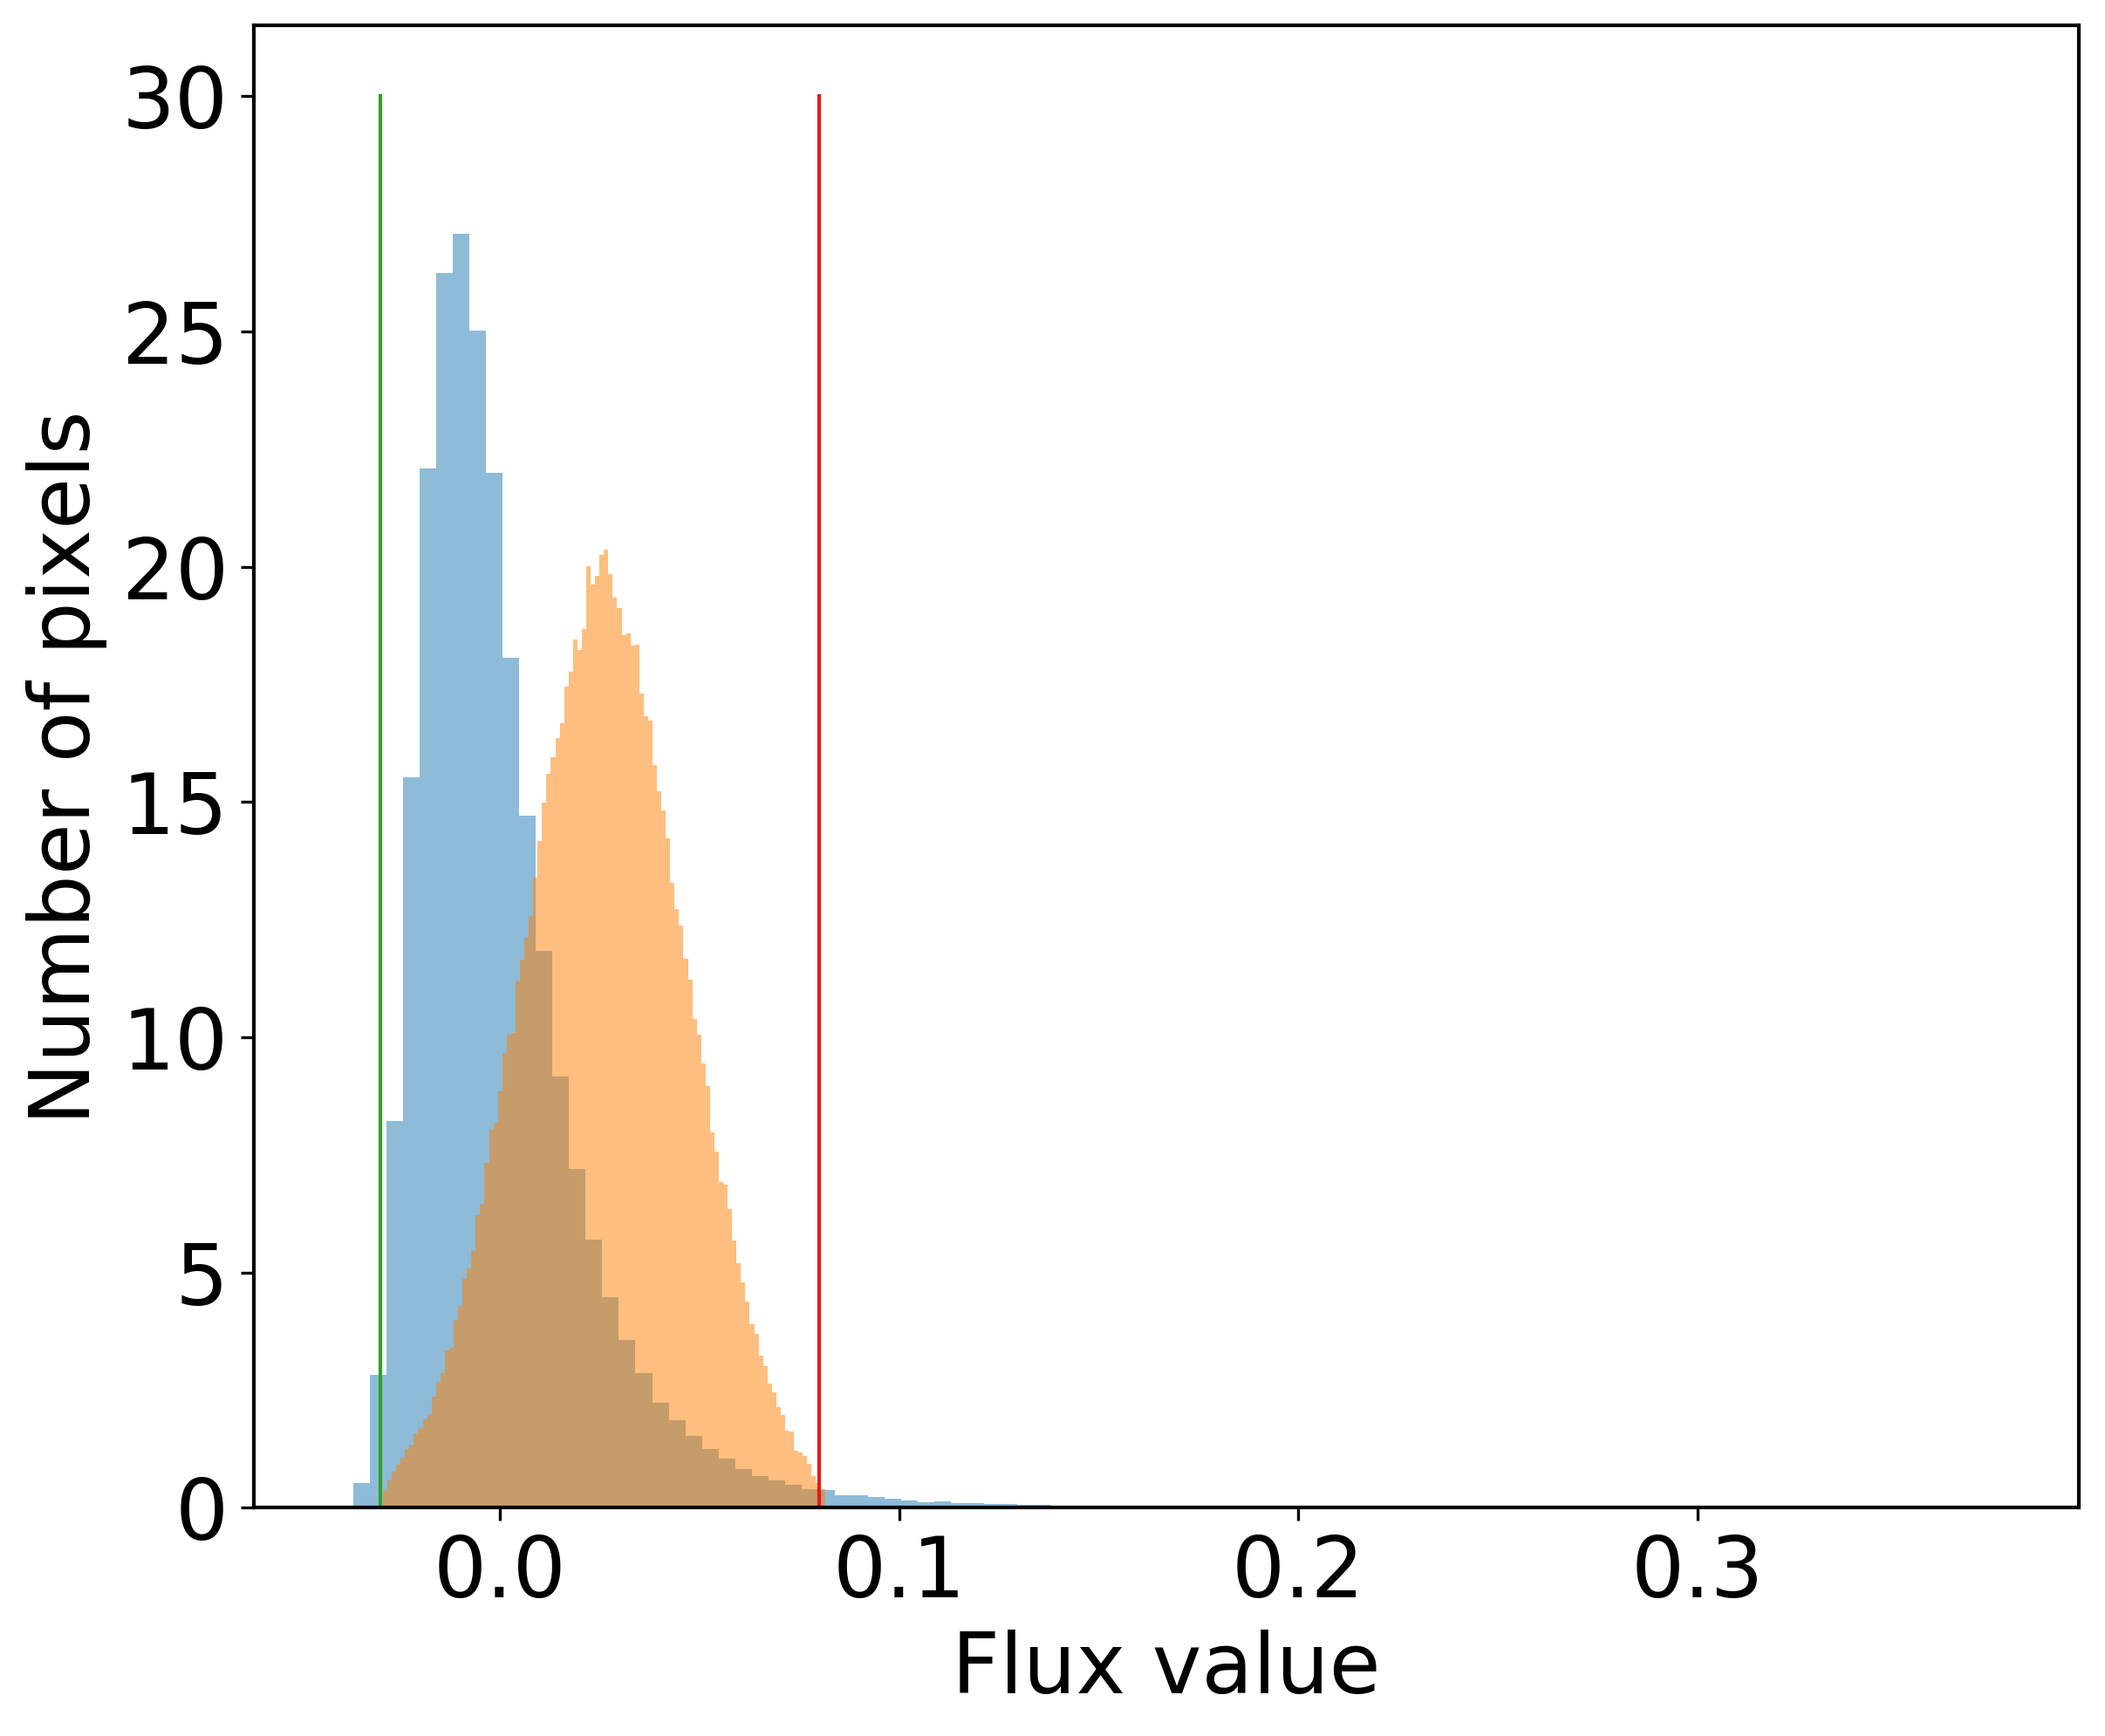

In [19]:
# load an initial guess
image = np.load("image_initial.npy")[0:1,:,:] 
plt.hist(image.ravel(), alpha=0.5, bins=100, normed=True);

image = np.load("../max_order=2.npy")
plt.hist(image.ravel(), alpha=0.5, bins=100, normed=True);

plt.plot([-0.03,-0.03],[0,30])
plt.plot([0.08,0.08],[0,30])
plt.ylabel("Number of pixels")
plt.xlabel("Flux value")